In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.**


In [ ]:
sample = df.sample(n=25, random_state=42)

In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 668 to 281
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               25 non-null     int64  
 1   Glucose                   25 non-null     int64  
 2   BloodPressure             25 non-null     int64  
 3   SkinThickness             25 non-null     int64  
 4   Insulin                   25 non-null     int64  
 5   BMI                       25 non-null     float64
 6   DiabetesPedigreeFunction  25 non-null     float64
 7   Age                       25 non-null     int64  
 8   Outcome                   25 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 2.0 KB


In [ ]:
mean_SG = sample['Glucose'].mean()
print("Sample Glucose mean: " + str(mean_SG))

mean_PG = df['Glucose'].mean()
print("Population Glucose mean: " + str(mean_PG))



Sample Glucose mean: 116.64
Population Glucose mean: 120.89453125


In [ ]:
max_SG = sample['Glucose'].max()
print("Highest Sample Glucose: " + str(max_SG))

max_PG = df['Glucose'].max()
print("Highest Population Glucose: " + str(max_PG))

Highest Sample Glucose: 183
Highest Population Glucose: 199


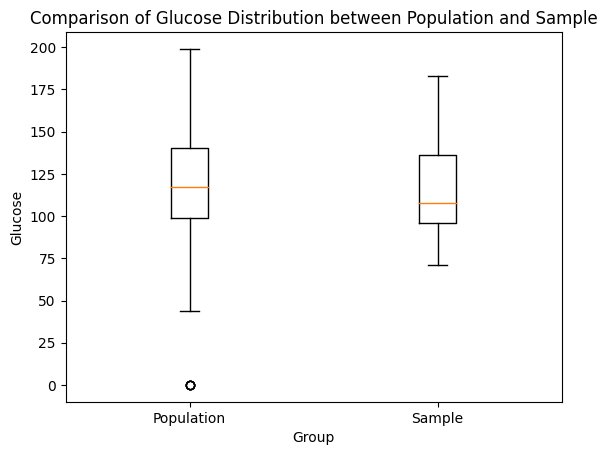

In [ ]:
import matplotlib.pyplot as plt
# Create a box plot
plt.boxplot([df['Glucose'], sample['Glucose']], labels=['Population', 'Sample'])
plt.xlabel('Group')
plt.ylabel('Glucose')
plt.title('Comparison of Glucose Distribution between Population and Sample')
plt.show()


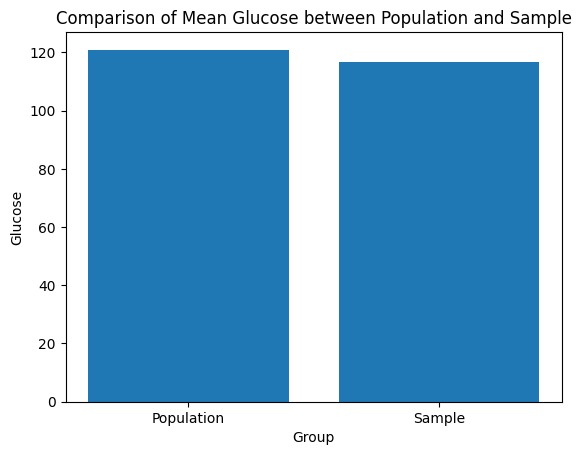

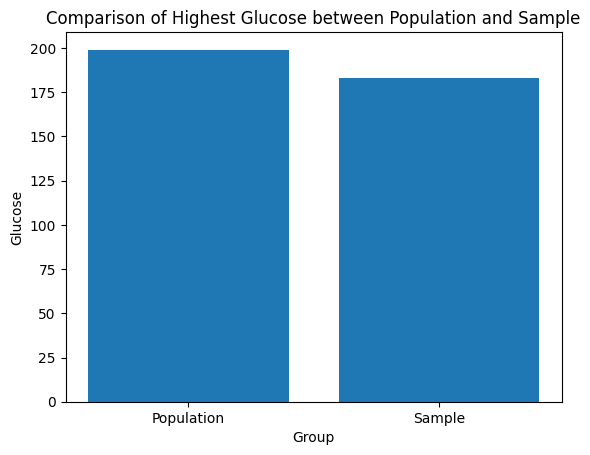

In [ ]:
# Create a bar plot
plt.bar(['Population', 'Sample'], [mean_PG, mean_SG])
plt.xlabel('Group')
plt.ylabel('Glucose')
plt.title('Comparison of Mean Glucose between Population and Sample')
plt.show()

# Create a bar plot
plt.bar(['Population', 'Sample'], [max_PG, max_SG])
plt.xlabel('Group')
plt.ylabel('Glucose')
plt.title('Comparison of Highest Glucose between Population and Sample')
plt.show()

**b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.**

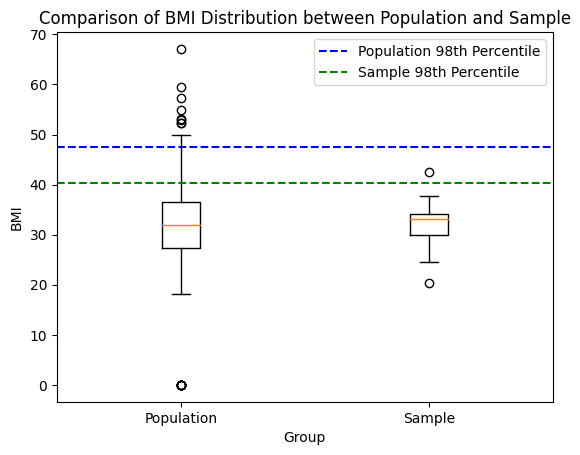

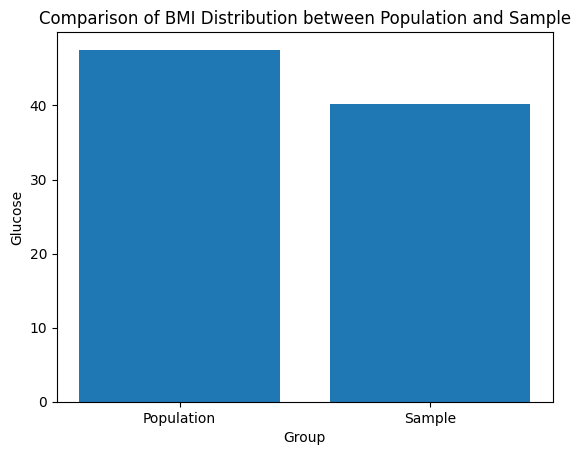

In [ ]:
import matplotlib.pyplot as plt

# Create a box plot for population and sample
plt.boxplot([df['BMI'], sample['BMI']], labels=['Population', 'Sample'])

population_bmi = np.percentile(df['BMI'], 98)
sample_bmi = np.percentile(sample['BMI'], 98)

# Highlight the 98th percentile with a horizontal line
plt.axhline(y=population_bmi, color='blue', linestyle='--', label='Population 98th Percentile')
plt.axhline(y=sample_bmi, color='green', linestyle='--', label='Sample 98th Percentile')

plt.xlabel('Group')
plt.ylabel('BMI')
plt.title('Comparison of BMI Distribution between Population and Sample')
plt.legend()
plt.show()

# Create a bar plot
plt.bar(['Population', 'Sample'], [population_bmi, sample_bmi])
plt.xlabel('Group')
plt.ylabel('Glucose')
plt.title('Comparison of BMI Distribution between Population and Sample')
plt.show()

**c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.**

In [ ]:
bs_means = []
bs_std_devs = []
bs_percentiles_98 = []

for _ in range(500):
    bs_sample = np.random.choice(df['BloodPressure'], size=150, replace=True)

    bs_means.append(np.mean(bs_sample))
    bs_std_devs.append(np.std(bs_sample))
    bs_percentiles_98.append(np.percentile(bs_sample, 98))

bs_mean = np.mean(bs_means)
print(bs_mean)

bs_std = np.std(bs_std_devs)
print(bs_std)

bs_per_98 = np.percentile(bs_percentiles_98, 98)
print(bs_per_98)

pop_mean = np.mean(df['BloodPressure'])
print(pop_mean)

pop_std = np.std(df['BloodPressure'])
print(pop_std)

pop_per_98 = np.percentile(df['BloodPressure'],98)
print(pop_per_98)


69.01661333333334
2.167174991893982
110.0
69.10546875
19.343201628981696
99.31999999999994


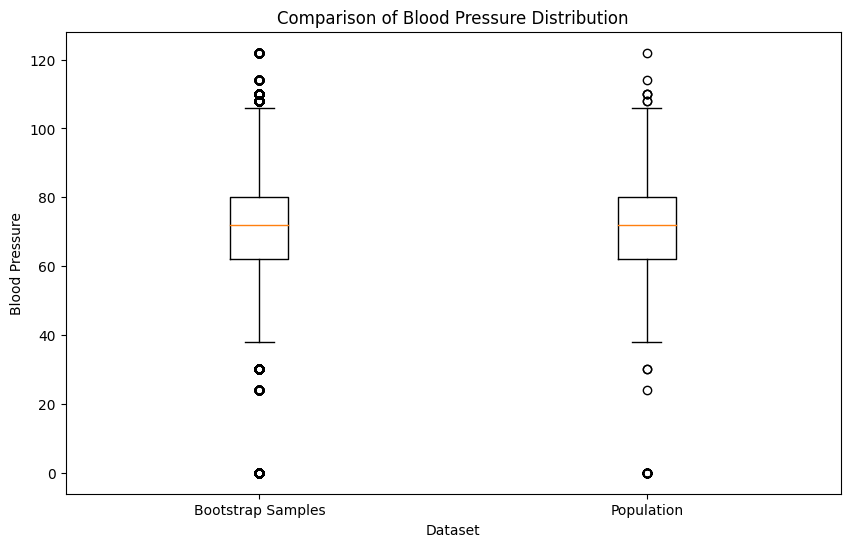

In [ ]:
# Create a box plot comparing the bootstrap samples with the population data
plt.figure(figsize=(10, 6))
plt.boxplot([bs_s, df['BloodPressure']], labels=['Bootstrap Samples', 'Population'])
plt.title('Comparison of Blood Pressure Distribution')
plt.xlabel('Dataset')
plt.ylabel('Blood Pressure')
plt.show()

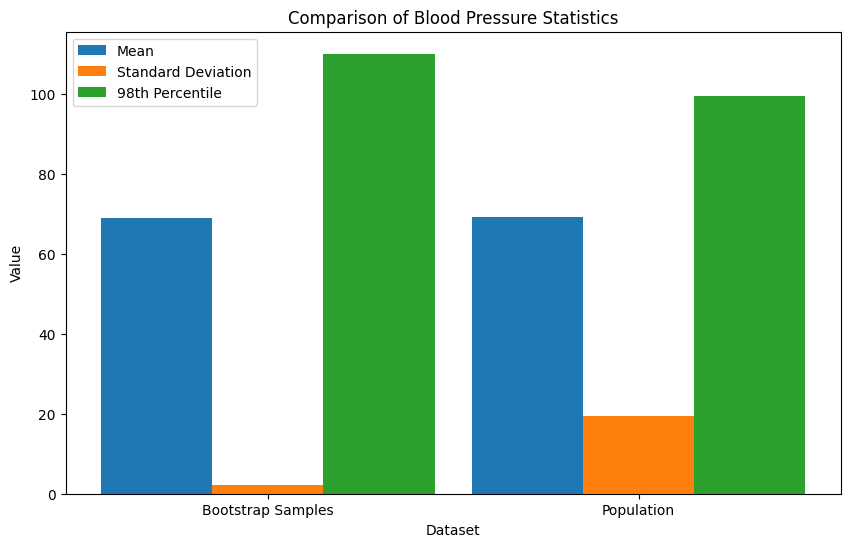

In [ ]:
means = [bs_mean, pop_mean]
stds = [bs_std, pop_std]
percentiles_98 = [bs_per_98, pop_per_98]
labels = ['Bootstrap Samples', 'Population']

# Create bar chart
x = range(len(labels))
width = 0.3

plt.figure(figsize=(10, 6))
plt.bar(x, means, width, label='Mean', align='center')
plt.bar([i + width for i in x], stds, width, label='Standard Deviation', align='center')
plt.bar([i + 2 * width for i in x], percentiles_98, width, label='98th Percentile', align='center')

plt.xlabel('Dataset')
plt.ylabel('Value')
plt.title('Comparison of Blood Pressure Statistics')
plt.xticks([i + width for i in x], labels)
plt.legend()
plt.show()

# **Findings:**

The difference in mean of bootstap sample and population is very small but the the standard deviation in bootstrap sample has less value compared to population which means the variability or data spread decreases after we bootstrap.